# Salifort Motors Project

## Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company, therefore they collected data from employees. As part of the data analytics professional, I am tasked to provide data-driven suggestions based on my understanding of the data. They have the following question: what's likely to make the employee leave the company?

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If I can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## Plan

### HR dataset

In this dataset, there are 14,999 rows, 10 columns, and these variables:

Variable | Description|
----- | -----|
`satisfaction_level`| Employee-reported job satisfaction level [0&ndash;1]|
`last_evaluation` | Score of employee's last performance review [0&ndash;1]|
`number_project` | Number of projects employee contributes to|
`average_monthly_hours` | Average number of hours an employee worked per month|
`time_spend_company` |How long the employee has been with the company (years)|
`Work_accident` |Whether or not the employee experienced an accident while at work|
`left` |Whether or not the employee left the company|
`promotion_last_5years` |Whether or not the employee was promoted in the last 5 years|
`Department` |The employee's department|
`salary` |The employee's salary (U.S. dollars)

### Imports

* Import packages
* Load dataset

In [1]:
# for data manipulation

import pandas as pd
import numpy as np

# for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# for displaying all the columns in dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# for data modeling

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for metrics and helpful functions

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,\
classification_report
from sklearn.tree import plot_tree

# for saving models
import pickle

In [2]:
# load dataset into a dataframe

data = pd.read_csv('/Users/salai/Library/CloudStorage/OneDrive-Personal/Desktop/Google Advance Data Analytic/Course 7_Cap Stone Project/Files/home/jovyan/work/HR_capstone_dataset.csv')

data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.3800,0.5300,2,157,3,0,1,0,sales,low
1,0.8000,0.8600,5,262,6,0,1,0,sales,medium
2,0.1100,0.8800,7,272,4,0,1,0,sales,medium
3,0.7200,0.8700,5,223,5,0,1,0,sales,low
4,0.3700,0.5200,2,159,3,0,1,0,sales,low


## Analyze

### Exploratory Data Analysis

* Understand variables
* Clean the dataset

In [3]:
# basic information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


> This dataset contains 14999 employees and 10 aspects about each employee. There are no missing values. The data types are 2 floats, 4 integers, and **2 objects**.

In [4]:
# gather descriptive statistics about the data

data.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.0000,14999.0000,14999.0000,14999.0000,14999.0000,14999.0000,14999.0000,14999.0000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.6128,0.7161,3.8031,201.0503,3.4982,0.1446,0.2381,0.0213,NaN,NaN
std,0.2486,0.1712,1.2326,49.9431,1.4601,0.3517,0.4259,0.1443,NaN,NaN
min,0.0900,0.3600,2.0000,96.0000,2.0000,0.0000,0.0000,0.0000,NaN,NaN
25%,0.4400,0.5600,3.0000,156.0000,3.0000,0.0000,0.0000,0.0000,NaN,NaN
50%,0.6400,0.7200,4.0000,200.0000,3.0000,0.0000,0.0000,0.0000,NaN,NaN
75%,0.8200,0.8700,5.0000,245.0000,4.0000,0.0000,0.0000,0.0000,NaN,NaN


> There may be outliers in `number_object` and `time_spend_company` since the max values are relatively much higher than 75th percentile values. For `Department`, there are 10 unique departments with sales class is most frequently appearing department. For `salary`, there are 3 unique categories of salary classes with low class being the most frequently appearing salary category.

In [5]:
# display all column names

data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# rename columns as needed

data = data.rename(columns={'average_montly_hours':'average_monthly_hours',
                           'time_spend_company':'tenure',
                           'Work_accident':'work_accident',
                            'Department':'department'})

# display all column names after the update

data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# check for missing values

data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in this dataset.

In [8]:
# check for duplicates

data.duplicated().sum()

3008

In [9]:
# percentage of duplicates in term of total entries

round(data.duplicated().sum()/len(data)*100,2)

20.05

There 3008 rows containing duplicates. That is 20.05% of the data

In [10]:
# inspect some rows containing duplicates

duplicates = data[data.duplicated(keep=False)]

print(len(duplicates))

duplicates.sort_values(by=['satisfaction_level','last_evaluation'])

5346


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
30,0.0900,0.6200,6,294,4,0,1,0,accounting,low
12030,0.0900,0.6200,6,294,4,0,1,0,accounting,low
14241,0.0900,0.6200,6,294,4,0,1,0,accounting,low
71,0.0900,0.7700,5,275,4,0,1,0,product_mng,medium
652,0.0900,0.7700,6,290,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.0000,0.8800,6,201,4,0,0,0,technical,low
10691,1.0000,0.9300,5,231,2,0,0,0,marketing,medium
11375,1.0000,0.9300,5,167,3,0,0,0,sales,medium
12902,1.0000,0.9300,5,231,2,0,0,0,marketing,medium


> The above output shows that there are 3 rows with same values for all the variables (the 1st 3 rows in the table). This is unlikely as no three employees will self-report the exact same response for every column.

In [11]:
# drop duplicates and save the resulting dataframe in a new variable

data_final = data.drop_duplicates(keep='first')

# check if duplicates still exist

data_final.duplicated().sum()

0

In [12]:
# check for outliers

def check_outliers(col_name:str, df):
    '''
    This function is used to check whether a variable contains outliers.
    In:
        col_name: name of the column that we are interested in checking for outliers.
        df: data frame where the column can be found
    
    Out: print to give whether the column contains outliers or not
    '''

    # calculate 25th and 75th percentiles of the column of interest
    
    percentile25 = df[col_name].quantile(0.25)
    percentile75 = df[col_name].quantile(0.75)

    # calculate interquantile range
    
    IQR = percentile75 - percentile25

    # calculate the lower and upper limit of the column of interest
    
    lower_limit = percentile25 - 1.5*IQR
    upper_limit = percentile75 + 1.5*IQR

    # create a conditional statement to check for the outliers
    
    if (df[col_name]<lower_limit).any() | (df[col_name]>upper_limit).any():
        print(f'{col_name} has outliers')
        print(f'{col_name} lower_limit: {lower_limit}')
        print(f'{col_name} upper_limit: {upper_limit}')
    else:
        print(f'{col_name} has no outliers')

In [13]:
# create a list of column names to be check for outliers

columns = ['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure']

# loop through the list using the check_outliers function

for col in columns:
    check_outliers(col, data_final)

satisfaction_level has no outliers
last_evaluation has no outliers
number_project has no outliers
average_monthly_hours has no outliers
tenure has outliers
tenure lower_limit: 1.5
tenure upper_limit: 5.5


 Since we are interested in whether the employee is likely to leave the company, our variable of interest is the `left`. We want to understand how many employees left and whether the classes in this variable are balance or require resampling due to class imbalance.

In [14]:
# number of people who left versus stayed

print(data_final['left'].value_counts())

# percentage of people who left versus stayed
print(data_final['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0   0.8340
1   0.1660
Name: proportion, dtype: float64


### Data Visualization

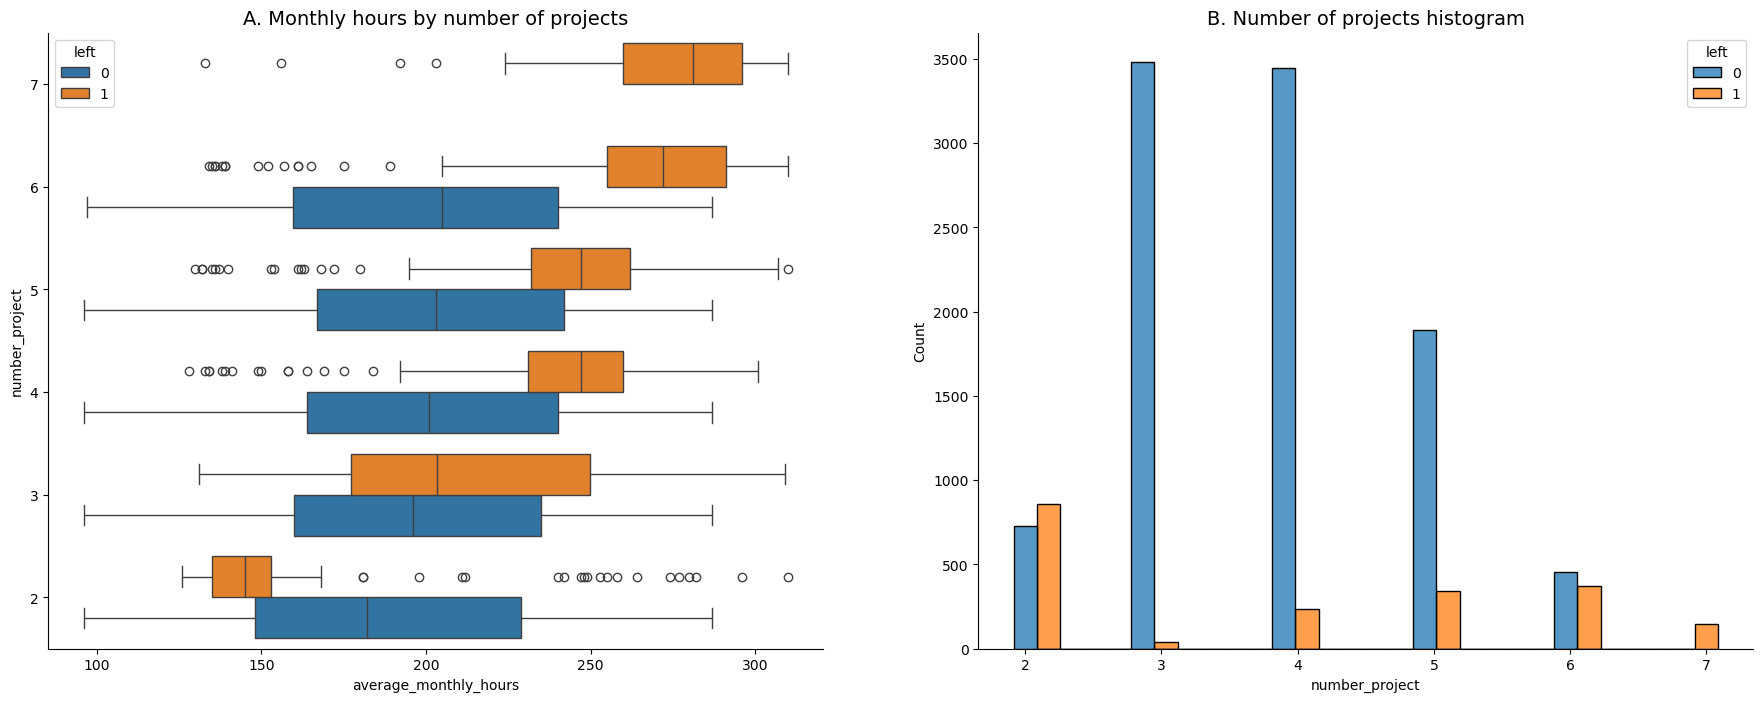

In [15]:
# boxplot showing 'average_monthly_hours' distribution for 'number_project', comparing employee who stayed vs left

fig, ax = plt.subplots(1,2, figsize=(22,8))

sns.despine()
sns.boxplot(data=data_final, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('A. Monthly hours by number of projects', fontsize='14')

# histogram showing the distribution of ''number_project',comparing employees who stayed vs left

sns.histplot(data=data_final, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('B. Number of projects histogram', fontsize='14')

# display the plots

plt.show()

From boxplot `A`, the median hours of each group (stayed and left) increase with the number of projects worked. This observation may be expected since people working on more projects also work longer hours. There are a few things to take note of from this boxplot:

* Two groups of employees left the company: 1st group consisted of those who worked less than their peers with the number of projects, and 2nd group who worked much more. For 1st group, it is possible that they were fired or issued their notice and assigned a few hours since they were in the process of leaving the company. For 2nd group, it is reasonable to infer that they probably quit. They might also be the largest contributors to many projects they worked on.
* Everyone with seven projects left the company, and their working hours ranged from 250 to 300 hours/month, much more than any other group.
* The optimal number of projects for employees to work on seems to be 3&mdash;4. The ratio of left/stay is very small for these two groups.
* Assuming 40 40-hour per week with 2 weeks of vacation per year, the average number of working hours per month of weekday employees will be `50 weeks * 40 hours per week / 12 months = 166.7 hours per month`. This means that apart from employees who worked on 2 projects, every group&mdash;even those who stayed with the company&mdash;seems to be overworked.

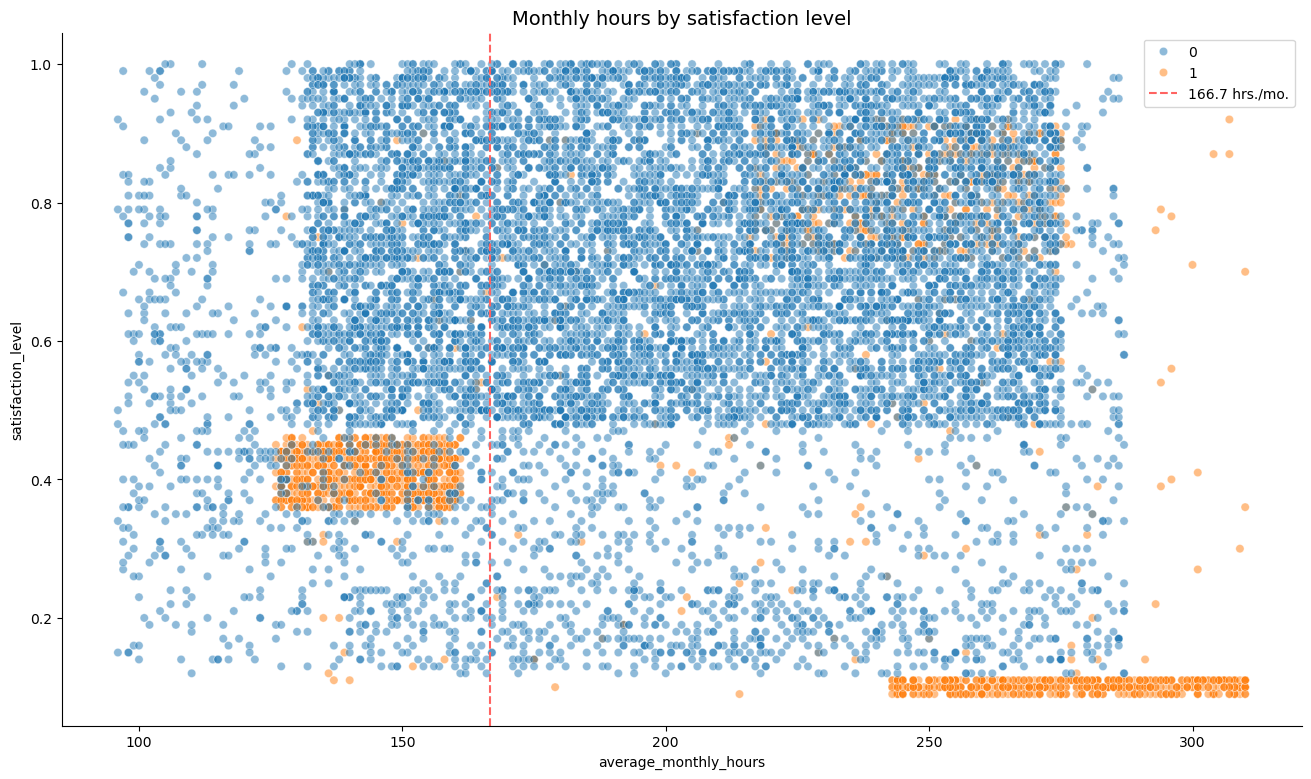

In [16]:
# scatterplot of 'average_monthly_hours' versus 'satisfaction_level', comparing employees who stayed and left

plt.figure(figsize=(16,9))

markers = {0:'stay', 1:'left'}
sns.scatterplot(data=data_final, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5)
sns.despine()
plt.axvline(x=166.7, color='#ff6361', label='166.7 hrs./mo.', ls='--')
plt.legend()
plt.title('Monthly hours by satisfaction level', fontsize='14')

plt.show()

The above scatterplot above shows that there a decent number of 'left' employees who worked ~250&mdash;300 hours per month which is relatively higher than average working hours per month for weekday employees. It is likely that this long working hours may be related to their satisfaction levels being close to zero.

There is also another group of 'left' employees who has normal working hours. However, their satisfaction level was only around 0.4. It may be difficult to pin point exact reason why they left. It is possible that they felt pressured to work more due to long working hours of their peers. This pressure could have lowered their satisfaction levels.

There are also a group of 'left' employees who worked ~210&mdash;280 hours per month, and their satisfaction levels ranges from 0.7&mdash;0.9, suggesting that long working hours may not be the sole factor for why the employees left the company.

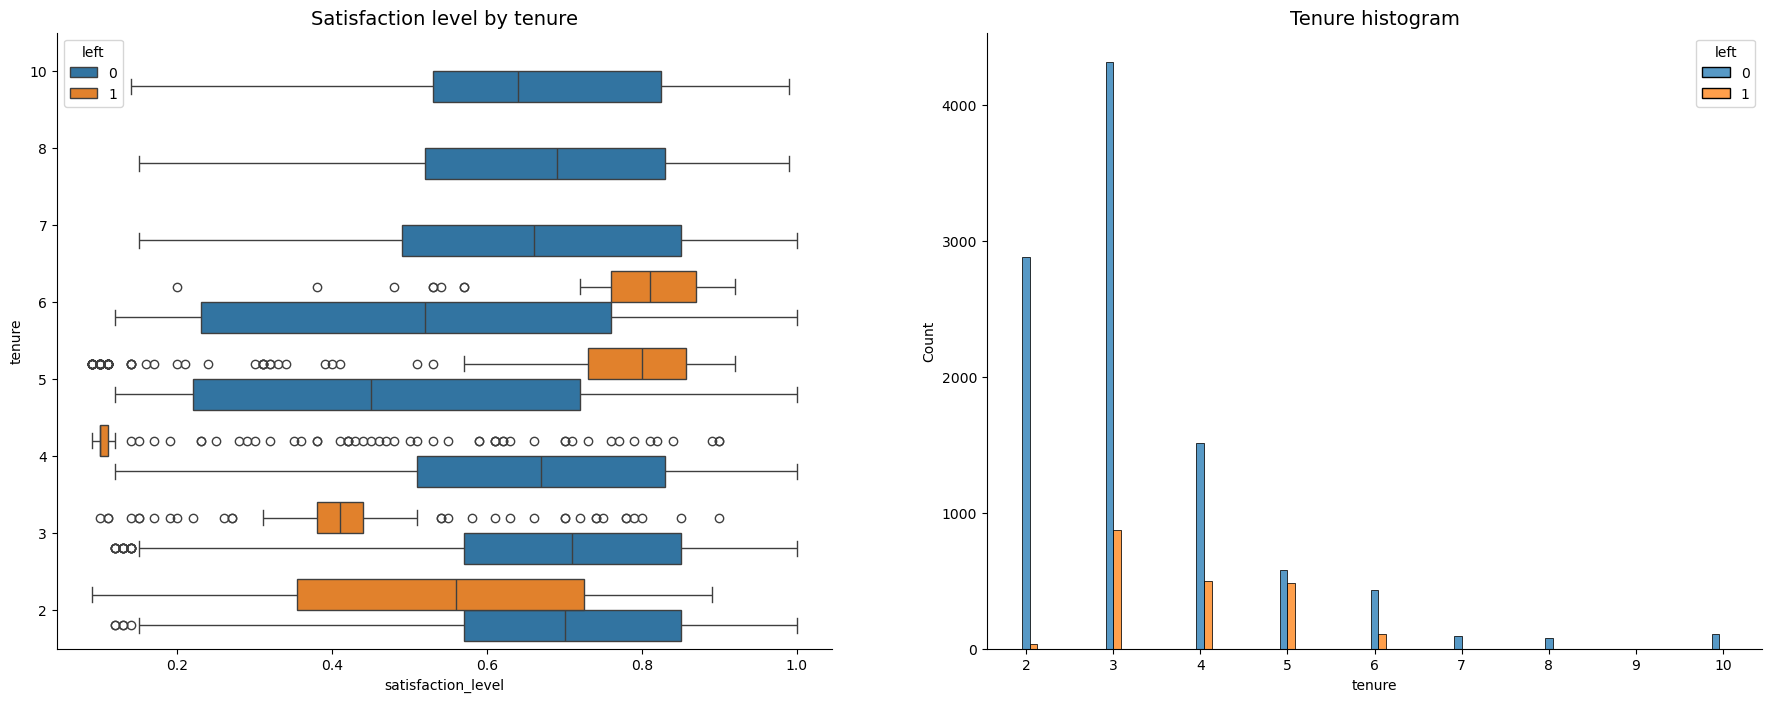

In [17]:
# boxplot showing distributions of 'satisfaction_level' by 'tenure', comparing employees who stayed or left

fig, ax = plt.subplots(1,2, figsize=(22,8))

sns.despine()
sns.boxplot(data=data_final, x='satisfaction_level',y='tenure', hue='left', orient='h',ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction level by tenure', fontsize='14')

# histogram showing distribution of 'tenure', comparing employees who stayed or left

sns.histplot(data=data_final, x='tenure', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

There are many observations from above boxplot.

1. 'left' employees fall into 2 categories: dissatisfied employees with shorter tenures and very satisfied employees with longer tenures.
2. 4th&ndash;year employees who left the company are extremely dissatisfied. It is worth investigating changes to company policy that might have affected people, especially at four&ndash;year mark.
3. There are also employees who stayed with the company for longer tenures and showed similar satisfaction level as newer employees. These employees present a small portion of the company's total hired and they could be at higher rank with higher paid.

In [18]:
# calculate the mean and median satisfaction scores of employees who stayed and left

data_final.groupby('left')['satisfaction_level'].agg({'mean','median'})

,mean,median
left,,
0,0.6674,0.6900
1,0.4403,0.4100


Overall, the mean and median satisfaction levels of those who left the company are lower than those who stayed with the company. Interestingly, the mean satisfaction levels of those who stayed with the company are slightly lower than the median satisfaction levels. This indicates that the satisfaction levels of those who stayed are at the higher end of the scores.

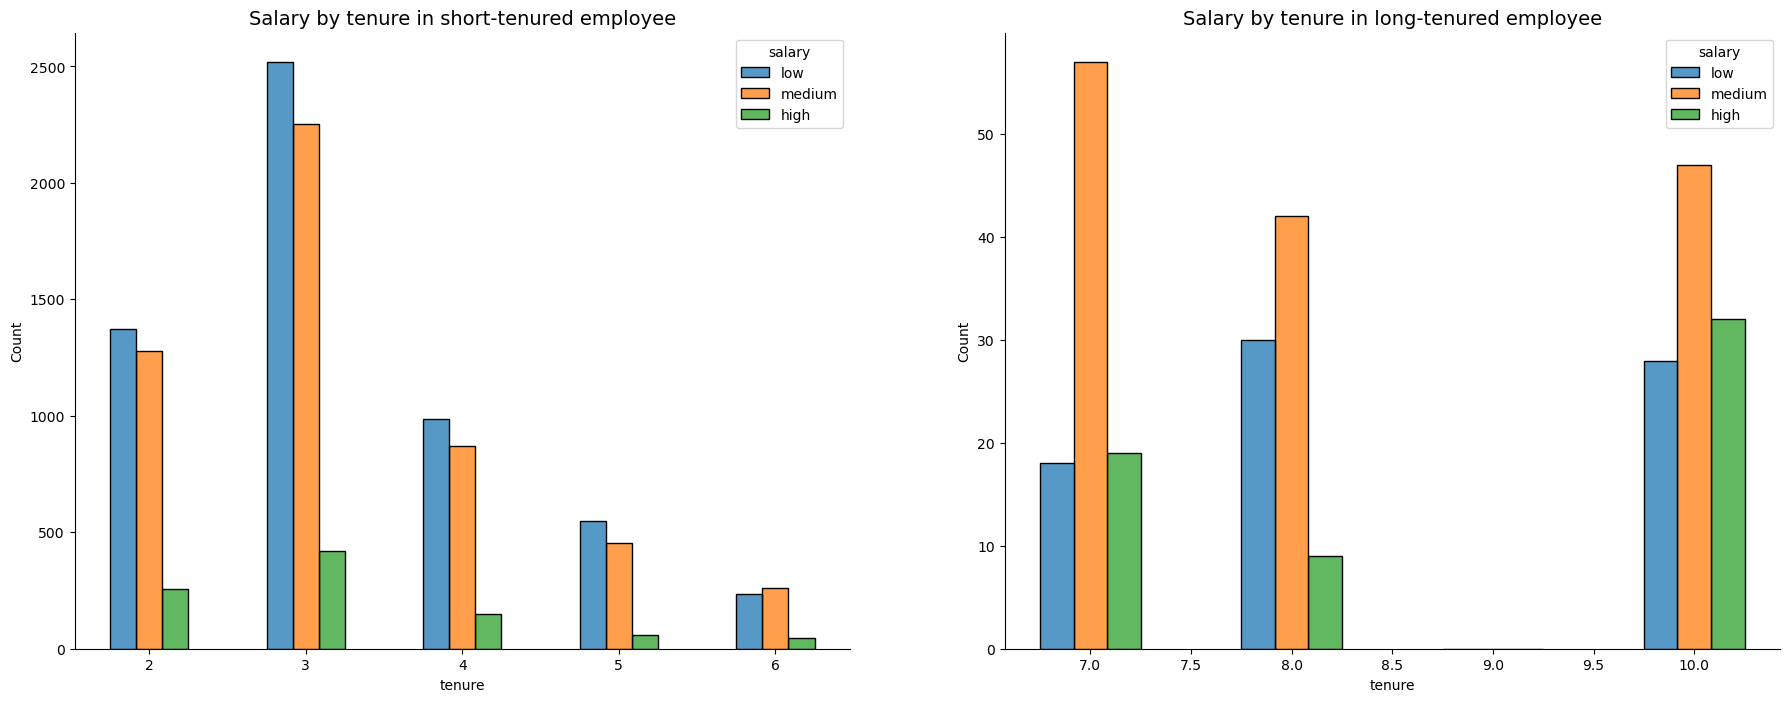

In [19]:
# define short-tenured employees

tenure_short = data_final[data_final['tenure']<7]

# define long-tenured employees

tenure_long = data_final[data_final['tenure']>6]

# plot short-tenured histogram

fig, ax = plt.subplots(1,2, figsize=(22,8))

sns.despine()
sns.histplot(data=tenure_short, x='tenure', hue='salary', multiple='dodge', shrink=0.5, discrete=1, hue_order=['low','medium','high'],
            ax=ax[0])
ax[0].set_title('Salary by tenure in short-tenured employee', fontsize='14')

sns.histplot(data=tenure_long, x='tenure', hue='salary', multiple='dodge', shrink=0.5, discrete=1, hue_order=['low','medium','high'],
            ax=ax[1])
ax[1].set_title('Salary by tenure in long-tenured employee', fontsize='14')

plt.show()

The above plots showed that long-tenured employees were not disproportionately comprised of higher-paid employees.

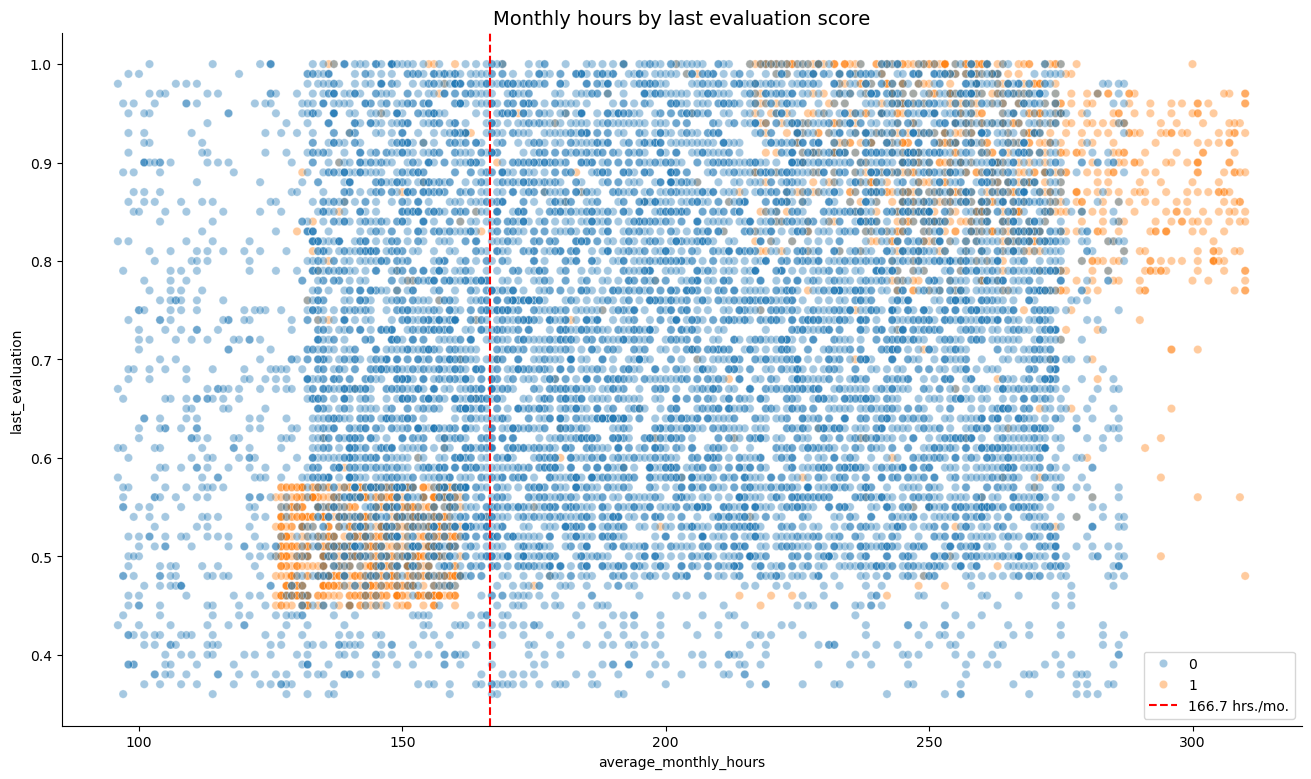

In [20]:
# scatterplot of 'average_monthly_hours' by 'last_evaluation', comparing those who stayed and left

plt.figure(figsize=(16,9))
sns.scatterplot(data=data_final, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
sns.despine()
plt.axvline(x=166.7, color='red', label='166.7 hrs./mo.', ls='--')
plt.legend()
plt.title('Monthly hours by last evaluation score', fontsize='14')

plt.show()

Belows are the observations made from above plot.

1. There are two groups of 'left' employees: overworked employees with high evaluation scores and employees who worked slightly below the monthly average of 166.7 hours with low evaluation scores.
2. There seemed to have correlation between working hours and evaluation scores.
3. Longer working hours does not guarantee a high evaluation scores as there are some employees who worked long hours but received low evaluation scores, highlighting that there may be other aspects that affect the evaluation scores.
4. From the plot, most employees worked well over the 166.7 hours per month.

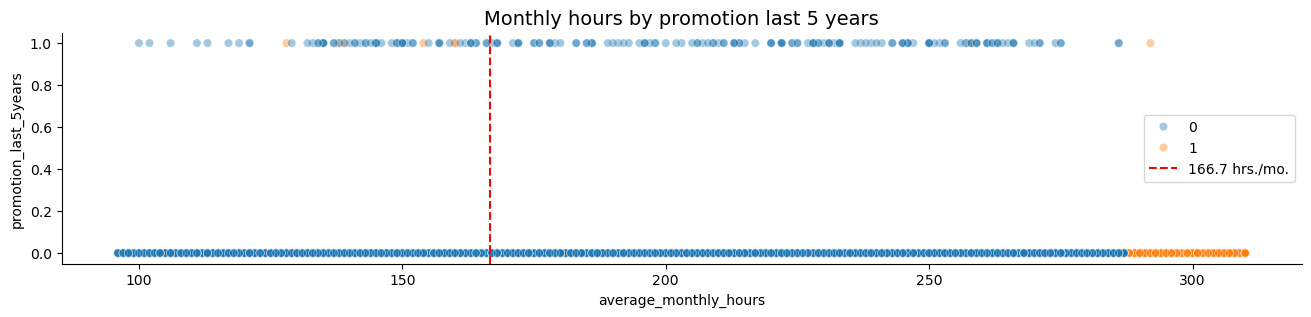

In [21]:
# plot to examine relationship between 'average_monthly_hours' and 'promotion_last_5years', comparing those who stayed vs left

plt.figure(figsize=(16,3))

sns.scatterplot(data=data_final, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
sns.despine()
plt.axvline(x=166.7, color='red', label='166.7 hrs./mo.', ls='--')
plt.legend()
plt.title('Monthly hours by promotion last 5 years', fontsize='14')
plt.show()

From above plot:
1. Only a few employees were promoted in the last 5 years.
2. There are more promotion for those who worked longer monthly hours.
3. Most of the 'left' employees worked longest hours without any promotion in the last 5 years.

In [22]:
# display counts of the each department

data_final['department'].value_counts(normalize=True)

department
sales         0.2701
technical     0.1871
support       0.1519
IT            0.0814
RandD         0.0579
product_mng   0.0572
marketing     0.0561
accounting    0.0518
hr            0.0501
management    0.0364
Name: proportion, dtype: float64

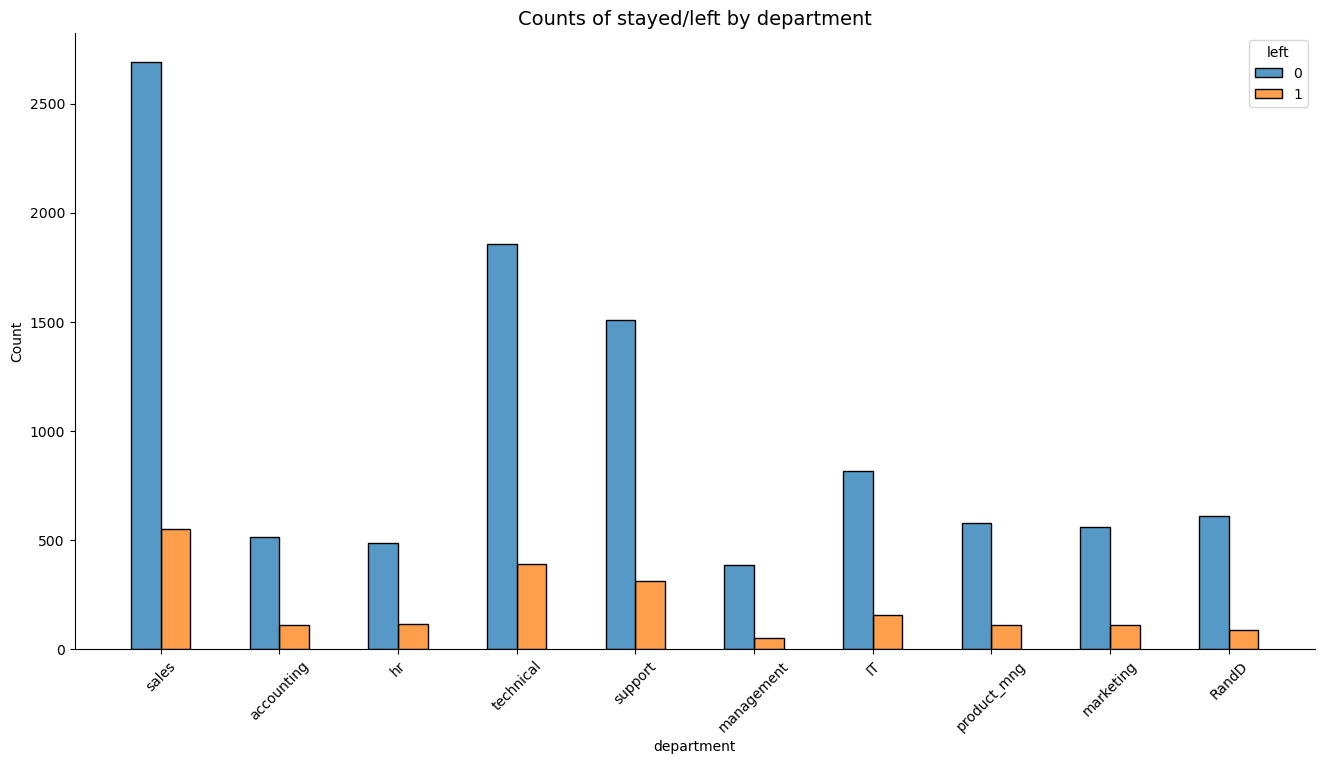

In [23]:
# stacked histogram to compare department distribution of employees who left vs stayed

plt.figure(figsize=(16,8))

sns.histplot(data=data_final, x='department', hue='left', discrete=1,
            multiple='dodge', shrink=0.5, hue_order=[0,1])
sns.despine()
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize='14')

plt.show()

From above histogram, the proportion of those who stayed to those who left is similar among all the departments.

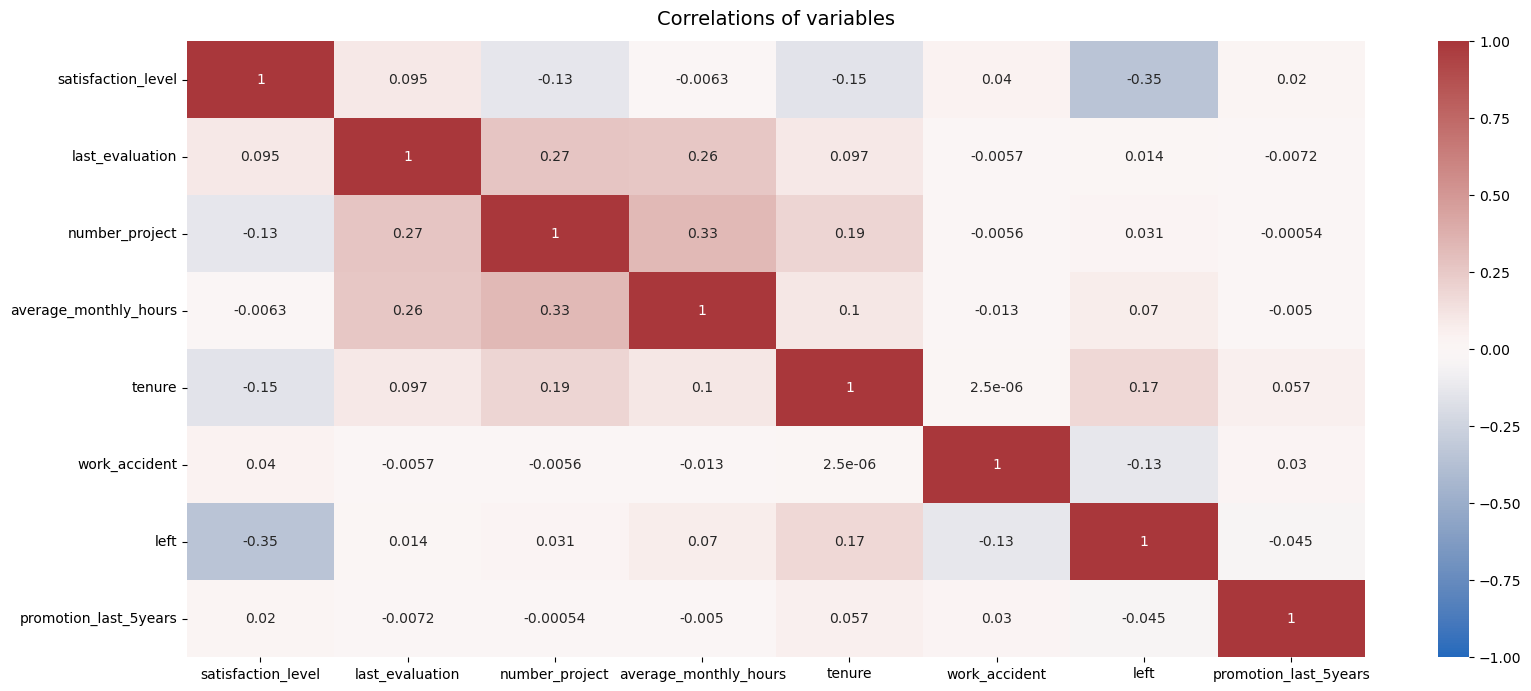

In [24]:
# plot correlation heatmap to check for correlations between variables

plt.figure(figsize=(19,8))

heatmap = sns.heatmap(data_final.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
heatmap.set_title('Correlations of variables', fontdict={'fontsize':14}, pad=12)

plt.show()

From above heatmap, the number of projects, last evaluation scores and average monthly hours are positively correlated while satisfaction levels were negatively associated with whether an employee leave or not.

### Insights

It seems to suggest that working long hours, handling many projects and low satisfaction levels are tied to employees leaving the company, highlighting the possible need to re-evaluate the company's management. It can be ungratifying to work long hours and not received promotions or good evaluation scores. Furthermore, there is a sizeable group of existing employees at this company who are probably burned out.

## Construct

#### Identify the type of prediction task

This project aims to predict whether an employee will leave the company, which is a categorical outcome variable. Hence, this task involves binary classification as the outcome variable `left` can be 1 (employee left) or 0 (employee stayed).

#### Identify the types of models most appropriate for this task

Since the target variable is categorical, we will build tree-based and ensemble-based classification models. These models can handle extra outliners and do not assume the underlying data distributions.

#### Parameters to evaluate the model

Since we will be using classification models, we can use the following parameters to evaluate the models:
> True Positive: The model predicted that the employee would leave, and indeed, the employee left.<br>
> True Negative: The model predicted that the employee would stay, and indeed, the employee stayed.<br>
> False Positive: The model predicted that the employee would leave, but the employee stayed instead.<br>
> False Negative: The model predicted the employee would stay, but the employee left.

Using these four parameters, we can calculate accuracy, precision, recall, and F1 scores. Since we want to ensure that the model can classify those who will leave so that management can implement measures to retain them, it would be costly to make too many false negative predictions.

### Tree-based models
* We will test out Decision Tree, Random Forest and XGBoost Classification models

#### Encoding variables

In [25]:
# copy the dataframe

df_encode = data_final.copy()

# encode the 'salary' column as the ordinal numeric category

df_encode['salary'] = (
    df_encode['salary'].astype('category')
    .cat.set_categories(['low','medium','high'])
    .cat.codes
)

# dummy encode the 'department' column

df_encode = pd.get_dummies(df_encode, drop_first=True, dtype='int')

df_encode.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.3800,0.5300,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.8000,0.8600,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.1100,0.8800,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.7200,0.8700,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.3700,0.5200,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# isolate the target variable

y = df_encode['left']
print(y.shape)

# select features for the models

X = df_encode.drop(['left'],axis=1)
print(X.shape)

(11991,)
(11991, 17)


In [27]:
# split the data into training and test data

X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# split the X-tr and y_tr into training and validation dataset

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=0)

In [28]:
# check whether the split is down properly

for x in [X_train,X_val, X_test]:
    print(x.shape)

(7194, 17)
(2398, 17)
(2399, 17)


#### Decision tree - 1st round

In [29]:
# instantiate model

dtr = DecisionTreeClassifier(random_state=0)

# assign a dictionary of hyperparameters to search over

dtr_params = {'max_depth':[4, 8, 10, None],
             'max_features':[0.5, 0.8, 1.0],
             'min_samples_split':[2,3],
             'min_samples_leaf':[1,2],
             }

# assign a dictionary of scoring metrics to capture

scoring = {'accuracy', 'precision', 'recall', 'f1'}

# instantiate gridsearch

dtr_cv = GridSearchCV(dtr,
                     dtr_params,
                     scoring=scoring,
                     cv=5, refit='recall')

In [30]:
%%time

# fit the training dataset into gridseach

#dtr_cv.fit(X_train, y_train)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs


In [31]:
def save_model(model_obj, path:str, model_name:str):
    '''
    save the fitted model in a designate file.
    IN:
        model_obj: A fitted GridSearch model
        path: path of folder where the fitted model will be saved
        model_name: Name of the saved model file
    OUT: A call to pickle the model in the folder indicated
    '''
    # complete file path
    file_path = os.path.join(path, model_name+'.pickle')

    #save the model
    with open(file_path,'wb') as to_write:
        pickle.dump(model_obj, to_write)

def read_pickle(path:str, model_name:str):
    '''
    In:
        path: path of folder where the fitted model will be save
        model_name: model that you want to read in
        
    Out:
        model: the pickled model
    '''
    # complete file path
    file_path = os.path.join(path, model_name+'.pickle')

    # retrive the saved fitted model
    with open(file_path, 'rb') as to_read:
        model = pickle.load(to_read)
    
    return model

In [32]:
# create file path to save the fitted models

path = '/Users/salai/Library/CloudStorage/OneDrive-Personal/Desktop/Google Advance Data Analytic/Porfolio Projects/Salifort Motor/'

import os

In [33]:
# saved the decision tree model

#save_model(dtr_cv, path, 'dtr_cv_round1')

In [34]:
# load the decision tree model

dtr_cv = read_pickle(path, 'dtr_cv_round1')

In [35]:
# check for best parameters

dtr_cv.best_params_

{'max_depth': 4,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [36]:
# check for best score

dtr_cv.best_score_

0.9205020920502092

In [37]:
def complie_scores(model_name:str, model_obj, metric:str):
    '''
    Generate a table of test scores.
    IN:
        model_name: How you want your model to be named in the output table
        mode_obj: A fitted GridSearchCV
        metric: precision, recall, f1 or accuracy
    OUT:
        return a pandas df with test scores.

    '''

    # dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'accuracy':'mean_test_accuracy',
                  'precision':'mean_test_precision',
                  'recall':'mean_test_recall',
                  'f1':'mean_test_f1'}

    # get all the results from the CV and put them in df
    cv_results = pd.DataFrame(model_obj.cv_results_)

    # isolate the row of the df with max(metric) score
    best_estimate = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(),:]

    # table of results
    table = pd.DataFrame({'Model':[model_name],
                          'Recall': [best_estimate.mean_test_recall],
                          'Precision':[best_estimate.mean_test_precision],
                          'F1': [best_estimate.mean_test_f1],
                          'Accuracy': [best_estimate.mean_test_accuracy],
                         })

    return table

In [38]:
# get all CV scores for decision tree

dtr_results = complie_scores('Decision Tree_CV', dtr_cv, 'recall')

dtr_results

,Model,Recall,Precision,F1,Accuracy
0,Decision Tree_CV,0.9205,0.9079,0.9141,0.9712


All the these scores from the decision tree model are strong indicators of good model performance.

However, decision tree can be vulnerable to overfitting, and random forests and XGBoost avoid overfitting by incorporating multiple trees to make predictions. We will construch random forest and XGBoost models.

#### Random forest - 1st round

In [39]:
# instantiate model

rf = RandomForestClassifier(random_state=0)

# assign a dictionary of hyperparameters to search over

rf_params = {'max_depth':[2, 5, 10, None],
            'n_estimators':[50, 100, 200, 500],
            'max_samples':[0.5, 0.8],
            'max_features':[0.5, 0.8, 1.0],
            'min_samples_split':[2,3],
            'min_samples_leaf':[1,2]
            }

# assign a dictionary of scoring metrics to capture

scoring= {'accuracy','precision','recall','f1'}

# instantiate GridSearch

rf_cv= GridSearchCV(rf, rf_params, scoring=scoring, cv=5, refit='recall', n_jobs=-1)

In [40]:
%%time

# fit training dataset to rf_cv

#rf_cv.fit(X_train, y_train)

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


In [41]:
# save the fitted random forest model

#save_model(rf_cv, path, 'rf_cv_round1')

In [42]:
# load the fitted random forest model

rf_cv = read_pickle(path, 'rf_cv_round1')

In [43]:
# check for best parameters

rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [44]:
# check for best score

rf_cv.best_score_

0.9171548117154812

In [45]:
# get all the CV scores for random forest model

rf_results = complie_scores('Random Forest_CV', rf_cv, 'recall')

round1_results = pd.concat([dtr_results,rf_results],axis=0)

round1_results.sort_values(by='Recall', ascending=False)

,Model,Recall,Precision,F1,Accuracy
0,Decision Tree_CV,0.9205,0.9079,0.9141,0.9712
0,Random Forest_CV,0.9172,0.9419,0.9292,0.9768


The recall scores of decision tree is slightly better than the random forest model, suggesting that decision tree model made fewer false negative predictions compare to random forest model.

#### XGBoost model - 1st round

In [46]:
# instantiate model

xgb = XGBClassifier(random_state=0)

# assign a dictionary of hyperparameters to search over

xgb_params = {'max_depth':[2, 5],
            'n_estimators':[50, 100, 300],
            'min_child_weight':[2],
            'learning_rate':[0.1, 0.2, 0.3],
            }

# assign a dictionary of scoring metrics to capture

scoring= {'accuracy','precision','recall','f1'}

# instantiate GridSearch

xgb_cv= GridSearchCV(xgb, xgb_params, scoring=scoring, cv=5, refit='recall', n_jobs=-1)

In [47]:
%%time

# fit training dataset into xgb_cv model

#xgb_cv.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


In [48]:
# save the fitted model

#save_model(xgb_cv, path, 'xgb_cv_round1')

In [49]:
# load the fitted model

xgb_cv = read_pickle(path, 'xgb_cv_round1')

In [50]:
# check for best parameters

xgb_cv.best_params_

{'learning_rate': 0.3,
 'max_depth': 2,
 'min_child_weight': 2,
 'n_estimators': 300}

In [51]:
# check for best score

xgb_cv.best_score_

0.9171548117154812

In [52]:
# get all the CV scores for XGBoost model

xgb_results = complie_scores('XGBoost_CV', xgb_cv, 'recall')

round1_results = pd.concat([round1_results,xgb_results],axis=0)

round1_results.sort_values(by='Recall', ascending=False)

,Model,Recall,Precision,F1,Accuracy
0,Decision Tree_CV,0.9205,0.9079,0.9141,0.9712
0,Random Forest_CV,0.9172,0.9419,0.9292,0.9768
0,XGBoost_CV,0.9172,0.9559,0.9359,0.9791


Based on above table, it seems that decision tree perform marginally better than both random forest and XGBoost models with regards to recall scores.

In [53]:
def models_test(X, y, model_obj, model_name:str):
    '''
    Generate a table of test scores.
    IN:
        X: numpy array of X_val data
        y: numpy array of y_val data
        model_obj: A fit GridSearchCV object
        model_name: How you want the model to be named in the output table

    OUT: pandas df of test scores of the model

    '''
    # get y predicted values from the model using X_val dataset
    val_pred = model_obj.best_estimator_.predict(X)

    # get the test scores using predicted y values versus original y_val dataset
    accuracy = accuracy_score(y, val_pred)
    precision = precision_score(y, val_pred)
    recall = recall_score(y, val_pred)
    f1 = f1_score(y, val_pred)

    #create a dataframe for all the test scores
    table = pd.DataFrame({'Model':[model_name],
                         'Recall':[recall],
                         'Precision':[precision],
                         'F1':[f1],
                         'Accuracy':[accuracy],
                         })
    return table

In [54]:
# get predictions on the test data using decision tree model

dtr_test = models_test(X_val, y_val, dtr_cv, 'Decision Tree_Val')

# get predictions on the test data using random forest model

rf_test = models_test(X_val, y_val, rf_cv, 'Random Forest_Val')

# get predictions on the test data using XGBoost model

xgb_test = models_test(X_val, y_val, xgb_cv, 'XGBoost_Val')

# complie all the test results

test_results = pd.concat([dtr_test, rf_test, xgb_test], axis=0)

round1_results = pd.concat([round1_results, test_results])

round1_results.sort_values(by='Recall', ascending=False)

,Model,Recall,Precision,F1,Accuracy
0,Random Forest_Val,0.9221,0.9658,0.9434,0.9817
0,Decision Tree_CV,0.9205,0.9079,0.9141,0.9712
0,XGBoost_Val,0.9196,0.9556,0.9373,0.9796
0,Random Forest_CV,0.9172,0.9419,0.9292,0.9768
0,XGBoost_CV,0.9172,0.9559,0.9359,0.9791
0,Decision Tree_Val,0.9121,0.9356,0.9237,0.9750


After testing all three models on the validation data set, it seems that random forest model gives the best recall scores compared to either decision tree or XGboost models. As mentioned previously, decision tree tends to have overfitting issues with training data and thus it may not perform well on the new unseen dataset. Hence, random forest model incorporates multiple trees to make predictions, it perform better than decision tree model on the unseen dataset.

#### Feature engineering

To accommodate real situations, we will perform feature selections and transformations in this section.

Likely, the company won't have satisfaction levels reported for all of its employees. It is also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided to quit or have already been identified by management as people to be fired, they may be working a few hours.

In the first modeling round, all variables were included as features. To build improved models, we will incorporate feature selections and transformations in this next round.

For this round, we will drop `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked and we will call this new feature `overworked`. It will be a binary variable.

In [55]:
# drop 'satisfaction_level' and save the resulting dataframe in a new variable

df_r2 = df_encode.drop(['satisfaction_level'], axis=1)

df_r2.head(5)

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.5300,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.8600,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.8800,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.8700,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.5200,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [56]:
# create 'overworked' column by replicating the 'average_monthly_hours'
df_r2['overworked'] = df_r2['average_monthly_hours']

# define 'overworked' as working more than 170 hrs/month since average number of monthly hours is 166.7 hours/month
df_r2['overworked'] = (df_r2['overworked']>170).astype('int')

df_r2.head(5)

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.5300,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0.8600,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,0.8800,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,0.8700,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.5200,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
# isolate the target variable

y = df_r2['left']

# select the features to be included in the models

X = df_r2.drop(['left','average_monthly_hours'], axis=1)

X.head(3)

,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.5300,2,3,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.8600,5,6,0,0,1,0,0,0,0,0,0,1,0,0,1
2,0.8800,7,4,0,0,1,0,0,0,0,0,0,1,0,0,1


In [58]:
# split the data into training and test data

X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# split the X-tr and y_tr into training and validation dataset

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, stratify=y_tr, random_state=0)

In [59]:
# check whether the split is down properly

for x in [X_train,X_val, X_test]:
    print(x.shape)

(7194, 16)
(2398, 16)
(2399, 16)


### Decision tree - 2nd round

In [60]:
# instantiate model

dtr2 = DecisionTreeClassifier(random_state=42)

# assign a dictionary of hyperparameters to search over

dtr2_params = {'max_depth':[4, 8, 10, None],
             'max_features':[0.5, 0.8, 1.0],
             'min_samples_split':[2,3],
             'min_samples_leaf':[1,2],
             }

# assign a dictionary of scoring metrics to capture

scoring = {'accuracy', 'precision', 'recall', 'f1'}

# instantiate gridsearch

dtr2_cv = GridSearchCV(dtr2,
                     dtr2_params,
                     scoring=scoring,
                     cv=5, refit='recall')

In [61]:
%%time
# fit the training dataset to dtr2_cv

#dtr2_cv.fit(X_train, y_train)

CPU times: user 24 µs, sys: 8 µs, total: 32 µs
Wall time: 5.72 µs


In [62]:
#save the fitted model

#save_model(dtr2_cv, path, 'dtr_cv_round2')

In [63]:
# load the fitted mode

dtr2_cv = read_pickle(path, 'dtr_cv_round2')

In [64]:
# get all CV scores for decision tree

dtr2_results = complie_scores('Decision Tree_2ndCV', dtr2_cv, 'recall')

dtr2_results

,Model,Recall,Precision,F1,Accuracy
0,Decision Tree_2ndCV,0.9088,0.7763,0.8373,0.9413


The scores fell and it is expected since fewer features were taken into account in this round of the model.  

#### Random forest - 2nd round

In [65]:
# instantiate model

rf2 = RandomForestClassifier(random_state=42)

# assign a dictionary of hyperparameters to search over

rf2_params = {'max_depth':[2, 5, 10, None],
            'n_estimators':[50, 100, 200, 500],
            'max_samples':[0.5, 0.8],
            'max_features':[0.5, 0.8, 1.0],
            'min_samples_split':[2,3],
            'min_samples_leaf':[1,2]
            }

# assign a dictionary of scoring metrics to capture

scoring= {'accuracy','precision','recall','f1'}

# instantiate GridSearch

rf2_cv= GridSearchCV(rf2, rf2_params, scoring=scoring, cv=5, refit='recall', n_jobs=-1)

In [66]:
%%time

# fit the training dataset to rf2_cv

#rf2_cv.fit(X_train, y_train)

CPU times: user 1e+03 ns, sys: 5 µs, total: 6 µs
Wall time: 4.29 µs


In [67]:
# save the fitted model

#save_model(rf2_cv, path, 'rf_cv_round2')

In [68]:
# load the fitted model

rf2_cv = read_pickle(path, 'rf_cv_round2')

In [69]:
# get all the CV scores of the random forest model

rf2_results = complie_scores('Random Forest_2ndCV', rf2_cv, 'recall')

round2_results = pd.concat([dtr2_results, rf2_results], axis=0)

round2_results.sort_values(by='Recall', ascending=False)

,Model,Recall,Precision,F1,Accuracy
0,Decision Tree_2ndCV,0.9088,0.7763,0.8373,0.9413
0,Random Forest_2ndCV,0.9029,0.8684,0.8852,0.9611


Based on above table and similar to round 1, decision tree model perform marginally better than random forest, in term of recall scores, at the cross-validation stage.

#### XGBoost - 2nd round

In [70]:
# instantiate model

xgb2 = XGBClassifier(random_state=42)

# assign a dictionary of hyperparameters to search over

xgb2_params = {'max_depth':[2, 5],
            'n_estimators':[50, 100, 300],
            'min_child_weight':[2],
            'learning_rate':[0.1, 0.2, 0.3],
            }

# assign a dictionary of scoring metrics to capture

scoring= {'accuracy','precision','recall','f1'}

# instantiate GridSearch

xgb2_cv= GridSearchCV(xgb2, xgb2_params, scoring=scoring, cv=5, refit='recall', n_jobs=-1)

In [71]:
%%time

# fit training dataset to xgb2_cv model
#xgb2_cv.fit(X_train, y_train)

CPU times: user 7 µs, sys: 11 µs, total: 18 µs
Wall time: 5.25 µs


In [72]:
# save the fitted model

#save_model(xgb2_cv, path, 'xgb_cv_round2')

In [73]:
# load the saved model

xgb2_cv = read_pickle(path, 'xgb_cv_round2')

In [74]:
# get all the CV scores of the XGBoost model

xgb2_results = complie_scores('XGBoost_2ndCV', xgb2_cv, 'recall')

round2_results = pd.concat([round2_results, xgb2_results], axis=0)

round2_results.sort_values(by='Recall', ascending=False)

,Model,Recall,Precision,F1,Accuracy
0,Decision Tree_2ndCV,0.9088,0.7763,0.8373,0.9413
0,Random Forest_2ndCV,0.9029,0.8684,0.8852,0.9611
0,XGBoost_2ndCV,0.8854,0.9052,0.8950,0.9655


Again and similar to round 1, decision tree model perform marginally better than random forest and XGBoost models, in term of recall scores, at the cross-validation stage.

## Execute

### Evaluate models

Evaluate models against validation data.

In [75]:
# get predictions on the test data using decision tree model

dtr_val = models_test(X_val, y_val, dtr2_cv, 'Decision Tree_Val')

# get predictions on the test data using random forest model

rf_val = models_test(X_val, y_val, rf2_cv, 'Random Forest_Val')

# get predictions on the test data using XGBoost model

xgb_val = models_test(X_val, y_val, xgb2_cv, 'XGBoost_Val')

# complie all the test results

Val_results = pd.concat([dtr_val, rf_val, xgb_val], axis=0)

round2_results = pd.concat([round2_results, Val_results])

round2_results.sort_values(by='Recall', ascending=False)

,Model,Recall,Precision,F1,Accuracy
0,Decision Tree_2ndCV,0.9088,0.7763,0.8373,0.9413
0,Decision Tree_Val,0.9045,0.7895,0.8431,0.9441
0,Random Forest_2ndCV,0.9029,0.8684,0.8852,0.9611
0,Random Forest_Val,0.8920,0.8787,0.8853,0.9616
0,XGBoost_2ndCV,0.8854,0.9052,0.8950,0.9655
0,XGBoost_Val,0.8844,0.9215,0.9026,0.9683


Based on above table, decision tree model has better recall scores than random_forest and XGBoost models, meaning decision tree predicts fewer false negatives than those of random_forest and XGBoost models. Hence, decision tree model is our champion model to be used on the test dataset.

### Use champion model to predict on test data

In [76]:
# use champion model to predict on test data

y_pred = dtr2_cv.best_estimator_.predict(X_test)

In [77]:
classification_report_dtr = classification_report(y_test, y_pred, target_names=['stayed','left'])

print(classification_report_dtr)

              precision    recall  f1-score   support

      stayed       0.98      0.95      0.97      2001
        left       0.79      0.91      0.85       398

    accuracy                           0.94      2399
   macro avg       0.89      0.93      0.91      2399
weighted avg       0.95      0.94      0.95      2399



This seems that decision tree model is a stable, well-preforming final model as the model has recall score of 91.0% which is marginally better than the recall score obtained from validation dataset.

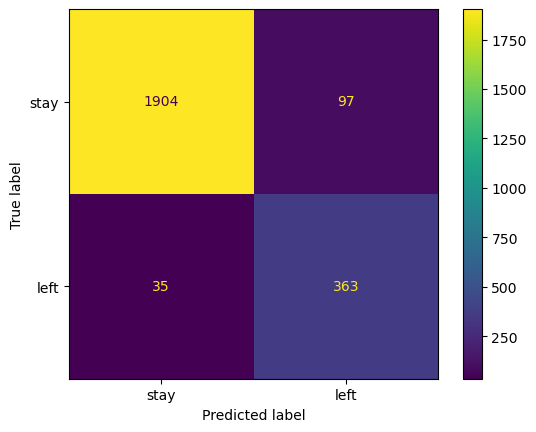

In [78]:
# generate array of values for confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=dtr2_cv.classes_)

# plot confusion matix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['stay','left'])

disp.plot(values_format='')

plt.show()

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired when that is actually not the case. But this is still a strong model.

#### Decision tree splits

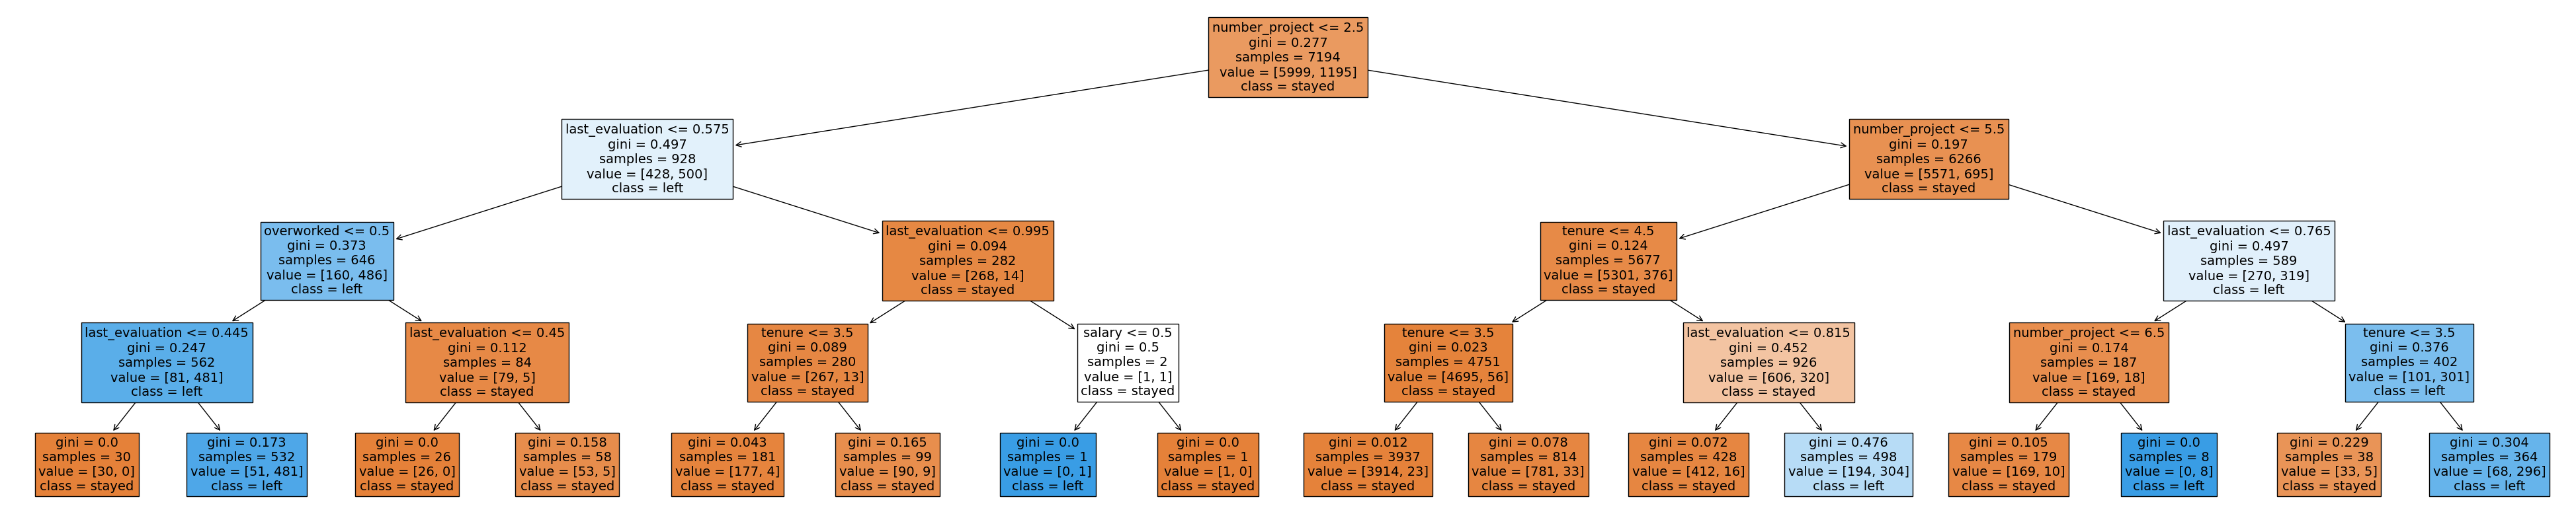

In [79]:
# plot the tree

plt.figure(figsize=(50,10))
plot_tree(dtr2_cv.best_estimator_, max_depth=4, fontsize=14, feature_names=X.columns, class_names={0:'stayed',1:'left'},
         filled=True)
plt.show()

#### Decision tree feature importance

In [80]:
# create pandas df for all the important features of the decision tree model

importance = pd.DataFrame(dtr2_cv.best_estimator_.feature_importances_,
                         columns=['gini_importance'],
                         index=X.columns)

importance = importance.sort_values(by='gini_importance', ascending=False)

# only extract features with importance >0

importance_final = importance[importance.gini_importance !=0]

importance_final

,gini_importance
number_project,0.4072
last_evaluation,0.3706
tenure,0.1530
overworked,0.0685
salary,0.0007


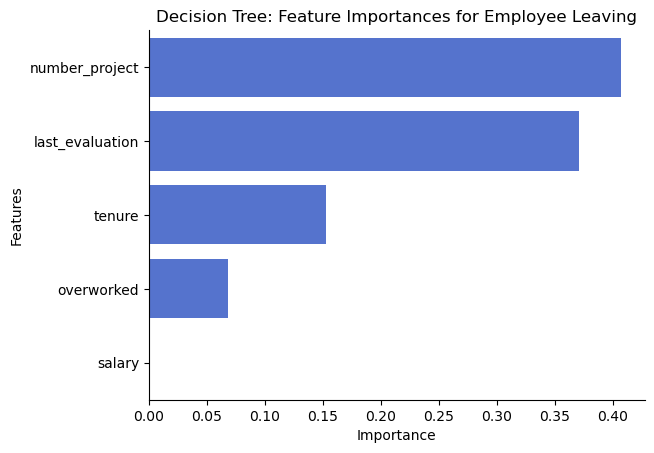

In [81]:
# create a bar plot to show the important features of the decision tree model

sns.barplot(data=importance_final, y=importance_final.index, x='gini_importance', orient='h', color='royalblue')
sns.despine()
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Decision Tree: Feature Importances for Employee Leaving', fontsize=12)
plt.show()

The barplot shows that in this decision tree model, `number_project`, `last_evaluation`, `tenure` and `overworked` have the higher importance, in that order. These variables are most helpful in predicting the target variable, `left`.

#### Random forest feature importance

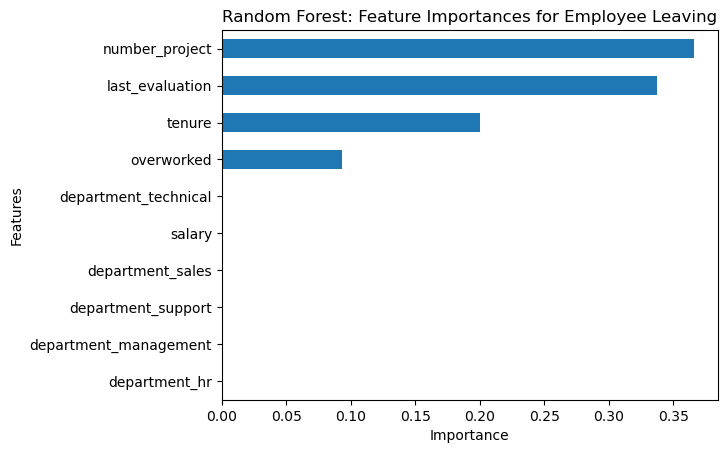

In [82]:
# get feature importance

feature_impt = rf2_cv.best_estimator_.feature_importances_

# create a pandas series for feature importance scores with feature names

feat_series = pd.Series(feature_impt, index=X.columns)

feat_series = feat_series.sort_values(ascending=False)

# filter only the top 10 important features

top10_feat = feat_series.head(10)

# plot the bar graph

fig, ax = plt.subplots()
top10_feat.plot(kind='barh', ax=ax)
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
ax.set_title('Random Forest: Feature Importances for Employee Leaving', fontsize=12)

plt.show()


The above plot shows that in this random forest model, `number_project`, `last_evaluation`, `tenure` and `overworked` have highest importance. These variables are most helpful in predicting the outcome variable, `left`, and they are same as the ones used by the decision tree model.

### Conclusion

After conducting feature engineering, the decision tree model achieved precision of 79%, recall of 91%, F1-score of 85%, and accuracy of 94% on the test set. Among all the three models, decision tree has the highest recall score, suggesting that this model make fewer false negatives (predicted the employ will stay when it is not the case) compared to other two models.

Both decision tree as well as random forest models confirm that employees at the company are overworked. To retain employees, the following recommendations may be considered:

1. Cap the number of projects that employees can work on.
2. Consider promoting employees who have been with the company for more than 3 years, or conduct further investigation about why fourth year employees are so dissatisfied.
3. Either reward employees for working long hours, or don't require them to do so.
4. High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionare scale for rewarding employees who contribute more.